## Statistics - Beta distribution

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division, unicode_literals

def lineplot(x, y):
    plt.plot(x,y)
    plt.xlabel('Hypotheses')
    plt.ylabel('Probabilities')

### 4.5 β-分布

In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution.

The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines. For example, it has been used as a statistical description of allele frequencies in population genetics;[1] time allocation in project management / control systems;[2] sunshine data;[3] variability of soil properties;[4] proportions of the minerals in rocks in stratigraphy;[5] and heterogeneity in the probability of HIV transmission.[6]

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. For example, the beta distribution can be used in Bayesian analysis to describe initial knowledge concerning probability of success such as the probability that a space vehicle will successfully complete a specified mission. The beta distribution is a suitable model for the random behavior of percentages and proportions.

The usual formulation of the beta distribution is also known as the beta distribution of the first kind, whereas beta distribution of the second kind is an alternative name for the beta prime distribution.

什么是β-分布？
，
在概率论和统计分析中，β分布是定义于区间[0,1]之上的连续概率分布，其分布模式由两个参数α和β控制，分别为随机变量的指数幂。

β分布常用于模拟随机变量在有限长度区间的行为模式，如群体遗传学中等位基因的频率，任务控制系统中的时间分配，天气的预测，HIV传播概率的异质性。

在贝叶斯推论中，β分布是伯努利分布、二项分布、负二项分布和几何分布的共轭先验概率分布。β分布可以用于在贝叶斯分析中描述成功率的起始分布，如果先验概率是β分布，那么后验概率也是β分布。

β分布的形状依赖于两个参数，α和β。如果先验概率分布的参数是`alpha`和`beta`，我们观察到`h`次正面和`t`次反面，后验概率也符合β分布，其参数是`alpha+h`和`beta+t`。这样，我们就可以通过加和来更新似然值。

幸运的是，对于很多现实的例子，β分布都可以用来作为先验概率的近似表示。对于均匀先验分布(`uniform prior`)来说，`aplha=1`和`beta=1`的β分布在`[0,1]`区间是均匀分布。




#### 4.5.1 Beta-分布详解

Beta-分布是狄里克雷分布(Dirichlet distribution)的一个特殊形式，其概率密度函数为：
$f(x;\alpha,\beta) = \frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1}$, 因为Beta分布是二项分布的参数p的概率分布，所以x(即p)的取值范围为$0<=x<=1$，概率密度函数可以重新写为$Beta(p|\alpha,\beta) = \frac{1}{B(\alpha,\beta)}p^{\alpha-1}(1-p)^{\beta-1}$。

Beta分布的期望 $E[p] = \frac{\alpha}{\alpha+\beta}$

Beta分布的方差 $var[p] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

Beta分布的众数 $mode=r=\frac{\alpha-1}{\alpha+\beta-2}$

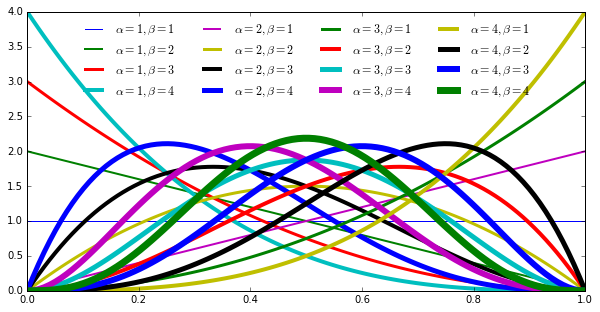

In [6]:
from scipy.stats import beta
x = np.linspace(0,1,100)

alphaL = [1,2,3,4]
betaL  = [1,2,3,4]

plt.figure(figsize=(10,5))

for i,alpha in enumerate(alphaL):
    for j,beta_p in enumerate(betaL):
        plt.plot(x, beta.pdf(x,alpha,beta_p),lw=i+j+1, label=r'$\alpha=%d, \beta=%d$' % (alpha, beta_p))

plt.legend(frameon=False, ncol=4, loc=9)

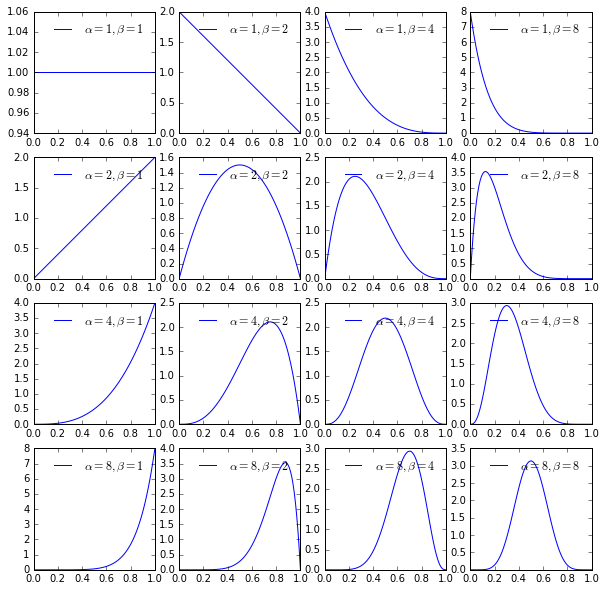

In [3]:
from scipy.stats import beta
x = np.linspace(0,1,100)

alphaL = [1,2,4,8]
betaL  = [1,2,4,8]

fig, grid = plt.subplots(len(alphaL),len(betaL), figsize=(10,10))

for i,alpha in enumerate(alphaL):
    for j,beta_p in enumerate(betaL):
        grid[i,j].plot(x, beta.pdf(x,alpha,beta_p),label=r'$\alpha=%d, \beta=%d$' % (alpha, beta_p))
        grid[i,j].legend(frameon=False)

Beta分布可以理解为代表某一概率的分布；当我们不知道这个概率的取值时，它代表这个概率所有可能的取值，和每个取值的概率。

在足球比赛中，有`命中率`的概念，就是一个球员射门成功的次数除以其总射门次数。这个命中率总是在区间[0,1]之内，0.3是平均命中率，0.35则认为是很高的命中率 【数值只是假设，未有实际意义】。

我们想预测一个足球运动员这个赛季的成绩，应该怎么做呢？如果用他开始几个球的平均命中率会有失偏颇，比如一个球员射门一次，中了，那么他的命中率就是100%；而另一个球员，射门一次，没中，命中率为0。但这不能说明其在后续比赛中不会进球。我们知道，大部分球员在赛季的命中率在[0.2,0.4]区间内，只有少数异常。如果一个球员在最开始比赛时发挥失利，我们可以预测他最后的结果可能会比平均水平低，但我们知道他最终的命中率应该不会偏离这个区间。

我们的命中率问题可以看做是一个二项分布(binomial distribution)，有一系列的`射中`和`未射中`构成。最好的方式代表球员的先验期望或者先验命中概率就是使用Beta分布。就是说在看到球员的表现之前，我们认为他的命中率为平均水平。Beta分布是在区间[0,1]上的分布，但如何选择分布的参数呢？

我们期望球员的平均命中率为0.3，方差为0.0324，上下浮动范围在[0.2, 0.4]之间，那么Beta分布的参数$\alpha$个$\beta$怎么获得呢？

我们知道Beta分布的平均值 $\mu = \frac{\alpha}{\alpha+\beta}$

Beta分布的方差 $var[p] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} = \bigl(\frac{\alpha}{\alpha+\beta}\bigr)\bigl(\frac{\beta}{\alpha+\beta}\bigr)\bigl(\frac{1}{\alpha+\beta+1}\bigr) =
\bigl(\frac{\alpha}{\alpha+\beta}\bigr)\bigl(1-\frac{\alpha}{\alpha+\beta}\bigr)\bigl(\frac{1}{\alpha+\beta+1}\bigr) = 
\frac{\mu*(1-\mu)}{\alpha+\beta+1}$

当平均命中率为0.3，方差为0.0324时，$\alpha+\beta = \frac{\mu(1-\mu)}{\delta^2}-1 = 0.3 * 0.7 / 0.0324 -1 = 5.48$，

则$\alpha=\mu(\alpha+\beta)=1.644$，

$\beta=(1-\mu)(\alpha+\beta)=3.837$。

0.299817184644


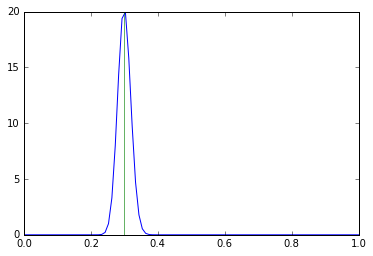

In [13]:
from scipy.stats import beta
x = np.linspace(0,1,100)

alpha = 164
betap  = 383

print beta.mean(alpha,betap)
plt.plot(x, beta.pdf(x,alpha,betap))
plt.axvline(beta.mean(alpha,betap),color='g',alpha=0.6)

这个图中X轴代表的命中率，也就是进球的概率。而Y轴也是概率，是进球的概率的概率，成为概率密度 (probability density)。所以Beta分布是代表概率的概率分布。

假如这个运动员射门成功`hits`次，失败`misses`次，新的Beta分布就是$Beta(164+hits, 383+misses)$。

0.312387791741


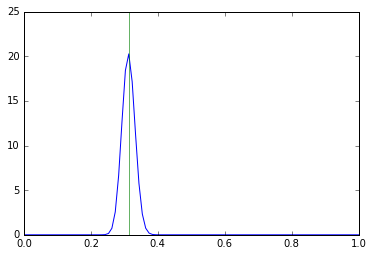

In [12]:
from scipy.stats import beta
x = np.linspace(0,1,100)

# 假如球员射球10次，全部命中
alpha = 164 + 10
betap  = 383
print beta.mean(alpha,betap)
plt.plot(x, beta.pdf(x,alpha,betap))
plt.axvline(beta.mean(alpha,betap),color='g',alpha=0.6)

0.408037094281


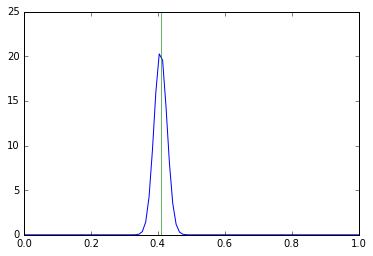

In [14]:
from scipy.stats import beta
x = np.linspace(0,1,100)

# 假如球员射球100次，全部命中
alpha = 164 + 100
betap  = 383
print beta.mean(alpha,betap)
plt.plot(x, beta.pdf(x,alpha,betap))
plt.axvline(beta.mean(alpha,betap),color='g',alpha=0.6)

0.311688311688


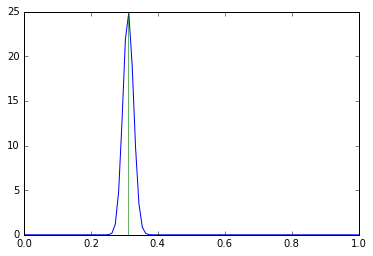

In [15]:
from scipy.stats import beta
x = np.linspace(0,1,100)

# 假如球员射球300次，命中100次
alpha = 164 + 100
betap = 383 + 200
print beta.mean(alpha,betap)
plt.plot(x, beta.pdf(x,alpha,betap))
plt.axvline(beta.mean(alpha,betap),color='g',alpha=0.6)

### Beta分布参考
* http://blog.csdn.net/watkinsong/article/details/46348853
* http://cos.name/2013/01/lda-math-beta-dirichlet/
* https://mqshen.gitbooks.io/prml/content/Chapter2/binary/beta_distribute.html
* http://xinsong.github.io/2014/04/29/beta/
* https://www.statlect.com/probability-distributions/beta-distribution
* http://scicomp.stackexchange.com/questions/2173/what-are-some-good-strategies-for-improving-the-serial-performance-of-my-code/2719#2719

In [8]:
from __future__ import division, unicode_literals
import logging

class Beta(object):
    '''
    Construct a Beta-distribution class
    '''
    def __init__(self, alpha=1, beta=1, label="_nolegend_"):
        self.alpha = alpha
        self.beta  = beta
        self.label = label
        self.hypos = [i/100.0 for i in range(0,101)]
    
    def Update(self, data):
        '''
        Update a Beta distribution.
        Reconstructed in child class.
        Below only used for an example, 
        data: pair of int numbers
        '''
        heads, tails = data
        self.alpha += heads
        self.beta  += tails
    
    def Mean(self):
        '''Compute the weighted mean of posterior distribution'''
        return self.alpha / (self.alpha + self.beta)
    
    def MAP(self):
        '''Compute the hypothesis with maximum posterior probability'''
        a = self.aplha - 1
        b = self.beta  - 1
        return a / (a + b)
    
    def EvalPdf(self, x):
        '''Evaluta the probability density function (PDF) at x (a hypo)
        '''
        return x ** (self.alpha-1) * (1-x) ** (self.beta-1)
    
    def MakePmf(self, hypos=None, label=None):
        '''Generate the probability mass function class subject.
        
        Note: Normally, we just evaluate the PDF at a sequence of points and
        treat the probability density as a probability mass.
        
        But if alpha or beta is less than one, we have to be more careful 
        because the PDF goes to infiinity at x=0 and x=1. In that case, we
        evaluate the CDF and compute differences.
        
        The result is a little funny, because the values at 0 and 1 are not
        symmetric. Nevertheless, it is a reasonable discrete model of the
        continuous distribution, and behaves well as the number of values
        increases.
        '''
        if self.alpha < 1 or self.beta < 1:
            return "Currently not supported"
        if hypos == None:
            hypos = self.hypos
            
        probs = [self.EvalPdf(hypo) for hypo in hypos]
        pmf   = Bayes(dict(zip(hypos, probs)), name=label)
        
        return pmf
        

Posterior mean: 0.559523809524


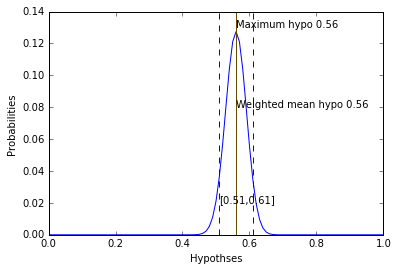

In [12]:
beta = Beta()
beta.Update([140,110])
print "Posterior mean:",beta.Mean()
hypos = [i/100.0 for i in range(0,101)]
coins = beta.MakePmf(hypos)

hypo, prob = coins.Items()
max_hypo, max_prob = coins.Max() 
plt.plot(hypo, prob)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axvline(max_hypo, color='r')
plt.annotate(xy=(max_hypo, 0.13),s="Maximum hypo "+str(max_hypo))
weighted_mean_hypo = coins.Mean()
plt.axvline(weighted_mean_hypo,color='g',alpha=0.6)
plt.annotate(xy=(weighted_mean_hypo,0.08),s="Weighted mean hypo %.2f" % weighted_mean_hypo)

lower_5 = coins.Percentile(5)
upper_95 = coins.Percentile(95)
plt.axvline(lower_5,color='b',ls="dashed")
plt.axvline(upper_95,color='b',ls="dashed")
plt.annotate(xy=(lower_5,0.02),s="["+str(lower_5)+','+str(upper_95)+']')

In [8]:
from scipy.stats import beta
help(beta)

Help on beta_gen in module scipy.stats._continuous_distns object:

class beta_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A beta continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `beta` is::
 |  
 |                          gamma(a+b) * x**(a-1) * (1-x)**(b-1)
 |      beta.pdf(x, a, b) = ------------------------------------
 |                                   gamma(a)*gamma(b)
 |  
 |  for ``0 < x < 1``, ``a > 0``, ``b > 0``, where ``gamma(z)`` is the gamma
 |  function (`scipy.special.gamma`).
 |  
 |  `beta` takes ``a`` and ``b`` as shape parameters.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      beta_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, *args, **kwds)
 |      Return MLEs for shape, location, and scale pa